In [1]:
# Pràctica 6 secció 1a


In [1]:
var("x y");

In [2]:
eq1=3*x+2*y

In [3]:
eq2=x-y

In [4]:
sol=solve([eq1,eq2],x,y);sol

[[x == 0, y == 0]]

In [5]:
px=sol[0][0].rhs();px

0

In [6]:
py=sol[0][1].rhs();py

0

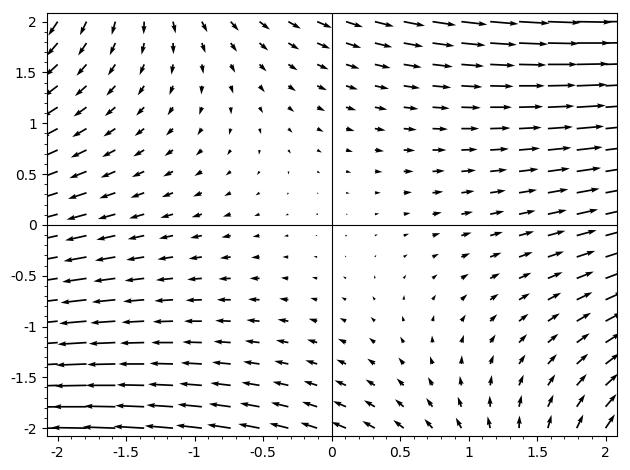

In [7]:
plot=plot_vector_field((eq1,eq2), (x,px-2,px+2), (y,py-2,py+2));plot

In [8]:
var("t");
x1=function("x1")(t);
y1=function("y1")(t);
eqd1=diff(x1(t),t)==eq1.subs(x=x1(t),y=y1(t));
eqd2=diff(y1(t),t)==eq2.subs(x=x1(t),y=y1(t));
eqd2


diff(y1(t), t) == x1(t) - y1(t)

In [9]:
sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px+0.5,py+0.5]);sol

[x1(t) == 1/6*(2*sqrt(6)*sinh(sqrt(6)*t) + 3*cosh(sqrt(6)*t))*e^t,
 y1(t) == -1/12*(sqrt(6)*sinh(sqrt(6)*t) - 6*cosh(sqrt(6)*t))*e^t]

In [10]:
plot1=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,-1.2,.37),color="yellow")

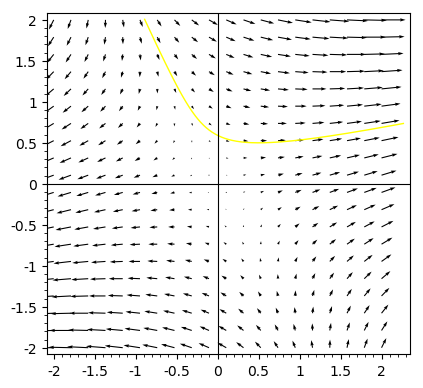

In [11]:
plot+plot1

In [12]:
sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px-0.5,py-0.5]);sol

[x1(t) == -1/6*(2*sqrt(6)*sinh(sqrt(6)*t) + 3*cosh(sqrt(6)*t))*e^t,
 y1(t) == 1/12*(sqrt(6)*sinh(sqrt(6)*t) - 6*cosh(sqrt(6)*t))*e^t]

In [13]:
plot2=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,-1.1,0.38),color="yellow")

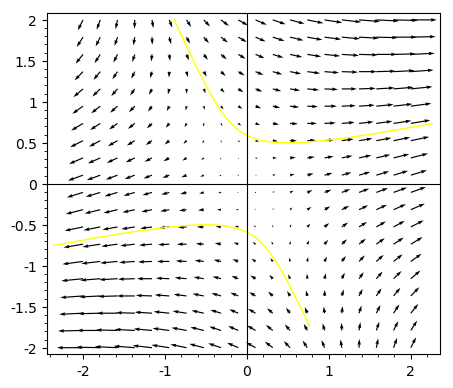

In [14]:
plot+plot1+plot2

In [15]:
sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px+0.5,py-0.5]);sol

[x1(t) == 1/2*cosh(sqrt(6)*t)*e^t,
 y1(t) == 1/4*(sqrt(6)*sinh(sqrt(6)*t) - 2*cosh(sqrt(6)*t))*e^t]

In [16]:
plot3=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,-0.9,0.6),color="yellow")

In [17]:
sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px-0.5,py+0.5]);sol

[x1(t) == -1/2*cosh(sqrt(6)*t)*e^t,
 y1(t) == -1/4*(sqrt(6)*sinh(sqrt(6)*t) - 2*cosh(sqrt(6)*t))*e^t]

In [18]:
plot4=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,-0.9,0.6),color="yellow")

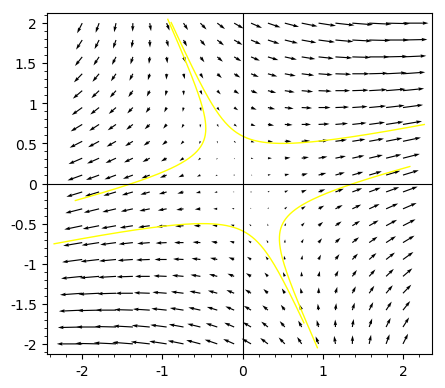

In [20]:
plot+plot1+plot2+plot3+plot4

In [19]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]);A

[ 3  2]
[ 1 -1]

In [20]:
A.eigenvalues()

[-sqrt(6) + 1, sqrt(6) + 1]

In [21]:
(N(A.eigenvalues()[0]),N(A.eigenvalues()[1]))

(-1.44948974278318, 3.44948974278318)

In [44]:
# Dos valors propis reals i de signe contrari: Tenim una SELLA

In [45]:
# En el cas de les selles podem comprovar que tenen unes òrbites especials que separen el comportament del
# flux al voltant de la sella. Aquestes òrbites s'anomenen SEPARATRIUS i es troven en la direcció dels 
# vector propis

In [22]:
vec=A.eigenvectors_right();vec

[(-sqrt(6) + 1, [(1, -1/2*sqrt(6) - 1)], 1),
 (sqrt(6) + 1, [(1, 1/2*sqrt(6) - 1)], 1)]

In [23]:
vec[0][0]

-sqrt(6) + 1

In [24]:
vec[0][1]

[(1, -1/2*sqrt(6) - 1)]

In [25]:
vec[0][1][0]

(1, -1/2*sqrt(6) - 1)

In [26]:
vec[0][1][0][0]

1

In [27]:
vec[0][1][0][1]

-1/2*sqrt(6) - 1

In [28]:
vec[1][0]

sqrt(6) + 1

In [29]:
vec[1][1][0][0]

1

In [30]:
vec[1][1][0][1]

1/2*sqrt(6) - 1

In [31]:
h=0.01 # farem un petit desplaçament del punt singular en la direcció del vector propi

In [32]:
sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]]);sol

[x1(t) == 1/100*(cosh(sqrt(6)*t) - sinh(sqrt(6)*t))*e^t,
 y1(t) == 1/600*(sqrt(6)*(sqrt(6) + 3)*sinh(sqrt(6)*t) - 3*(sqrt(6) + 2)*cosh(sqrt(6)*t))*e^t]

In [33]:
sep1=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,2.1*vec[0][0],0),color="blue")

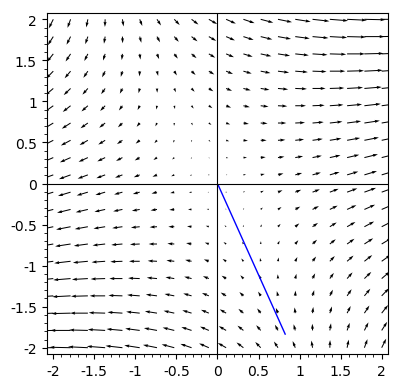

In [34]:
plot+sep1

In [35]:
if(vec[0][0]<0):
    sep1=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,2.1*vec[0][0],0),color="blue")
elif (vec[0][0]>0):
    sep1=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,0,2.1*vec[0][0],0),color="red")

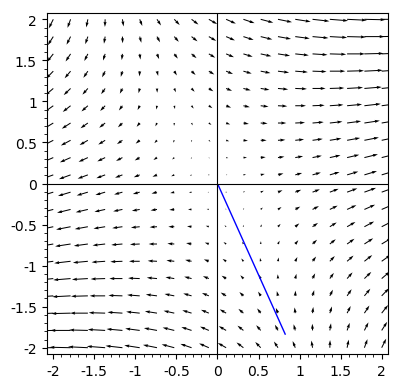

In [36]:
plot+sep1

In [37]:
i1=0;sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px+h*vec[i1][1][0][0],py+h*vec[i1][1][0][1]]);sol

[x1(t) == 1/100*(cosh(sqrt(6)*t) - sinh(sqrt(6)*t))*e^t,
 y1(t) == 1/600*(sqrt(6)*(sqrt(6) + 3)*sinh(sqrt(6)*t) - 3*(sqrt(6) + 2)*cosh(sqrt(6)*t))*e^t]

In [38]:
i3=2.1;
if(vec[i1][0]<0):
    sep1=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,i3*vec[i1][0],0),color="blue")
elif (vec[i1][0]>0):
    sep1=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,0,i3*vec[i1][0],0),color="red")

In [39]:
sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px-h*vec[i1][1][0][0],py-h*vec[i1][1][0][1]]);sol

[x1(t) == -1/100*(cosh(sqrt(6)*t) - sinh(sqrt(6)*t))*e^t,
 y1(t) == -1/600*(sqrt(6)*(sqrt(6) + 3)*sinh(sqrt(6)*t) - 3*(sqrt(6) + 2)*cosh(sqrt(6)*t))*e^t]

In [40]:
i3=2.1;
if(vec[i1][0]<0):
    sep2=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,i3*vec[i1][0],0),color="blue")
elif (vec[i1][0]>0):
    sep2=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,0,i3*vec[i1][0],0),color="red")

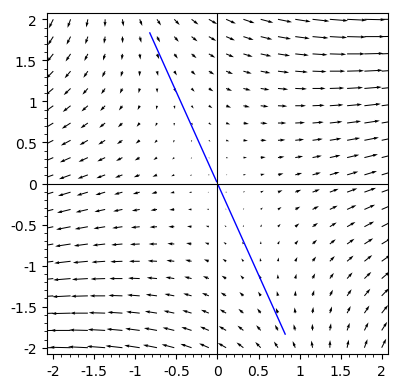

In [41]:
plot+sep1+sep2

In [42]:
i1=1;sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px+h*vec[i1][1][0][0],py+h*vec[i1][1][0][1]]);sol

[x1(t) == 1/100*(cosh(sqrt(6)*t) + sinh(sqrt(6)*t))*e^t,
 y1(t) == -1/600*(sqrt(6)*(sqrt(6) - 3)*sinh(sqrt(6)*t) - 3*(sqrt(6) - 2)*cosh(sqrt(6)*t))*e^t]

In [43]:
i3=0.44;
if(vec[i1][0]<0):
    sep3=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,i3*vec[i1][0],0),color="blue")
elif (vec[i1][0]>0):
    sep3=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,0,i3*vec[i1][0]),color="red")

In [44]:
sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px-h*vec[i1][1][0][0],py-h*vec[i1][1][0][1]]);sol

[x1(t) == -1/100*(cosh(sqrt(6)*t) + sinh(sqrt(6)*t))*e^t,
 y1(t) == 1/600*(sqrt(6)*(sqrt(6) - 3)*sinh(sqrt(6)*t) - 3*(sqrt(6) - 2)*cosh(sqrt(6)*t))*e^t]

In [45]:
i3=0.44;
if(vec[i1][0]<0):
    sep4=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,i3*vec[i1][0],0),color="blue")
elif (vec[i1][0]>0):
    sep4=parametric_plot( (sol[0].rhs(),sol[1].rhs() ),(t,0,i3*vec[i1][0]),color="red")

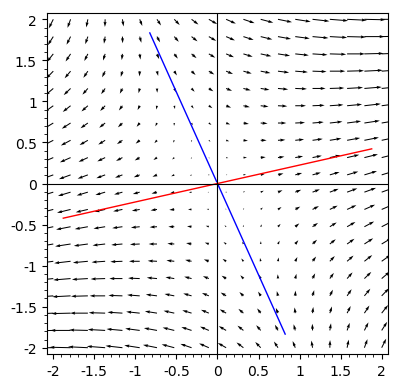

In [48]:
plot+sep1+sep2+sep3+sep4

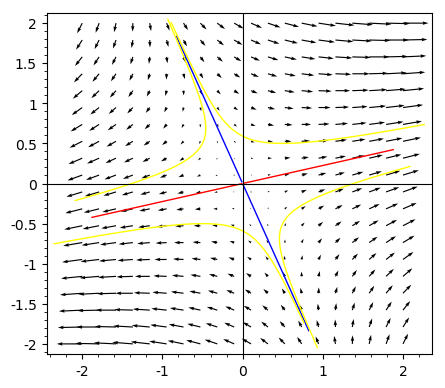

In [49]:
plot+sep1+sep2+sep3+sep4+plot1+plot2+plot3+plot4